In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm


In [90]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [92]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [93]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [94]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [95]:
data.duplicated().value_counts()

False    1470
Name: count, dtype: int64

In [96]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(data['MonthlyIncome'])

Outliers: [19094, 18947, 19545, 18740, 18844, 18172, 17328, 16959, 19537, 17181, 19926, 19033, 18722, 19999, 16792, 19232, 19517, 19068, 19202, 19436, 16872, 19045, 19144, 17584, 18665, 17068, 19272, 18300, 16659, 19406, 19197, 19566, 18041, 17046, 17861, 16835, 16595, 19502, 18200, 16627, 19513, 19141, 19189, 16856, 19859, 18430, 17639, 16752, 19246, 17159, 17924, 17099, 17444, 17399, 19419, 18303, 19973, 19845, 17650, 19237, 19627, 16756, 17665, 16885, 17465, 19626, 19943, 18606, 17048, 17856, 19081, 17779, 19740, 18711, 18265, 18213, 18824, 18789, 19847, 19190, 18061, 17123, 16880, 17861, 19187, 19717, 16799, 17328, 19701, 17169, 16598, 17007, 16606, 19586, 19331, 19613, 17567, 19049, 19658, 17426, 17603, 16704, 19833, 19038, 19328, 19392, 19665, 16823, 17174, 17875, 19161, 19636, 19431, 18880]


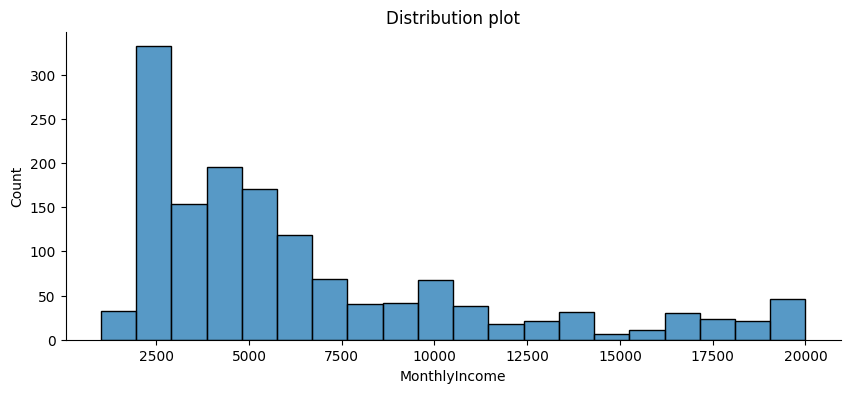

In [97]:
def hist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.histplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
hist_plots(data['MonthlyIncome'])

In [98]:
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
                 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_features = ['Attrition', 'BusinessTravel','Department', 'Education', 'EducationField', 'EmployeeCount','EmployeeNumber',
                    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                    'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                    'WorkLifeBalance']

df1 = data.copy(deep = True)

In [99]:
le = LabelEncoder()
l1 = []; l2 = []; text_categorical_features = []
print('Label Encoder Transformation')
for i in tqdm(categorical_features):
    if type(df1[i][0]) == str:
        text_categorical_features.append(i)
        df1[i] = le.fit_transform(df1[i])
        l1.append(list(df1[i].unique())); l2.append(list(le.inverse_transform(df1[i].unique())))
        print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation


100%|██████████| 20/20 [00:00<00:00, 1990.98it/s]

Attrition  :  [1 0]  =  ['Yes' 'No']
BusinessTravel  :  [2 1 0]  =  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department  :  [2 1 0]  =  ['Sales' 'Research & Development' 'Human Resources']
EducationField  :  [1 4 3 2 5 0]  =  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender  :  [0 1]  =  ['Female' 'Male']
JobRole  :  [7 6 2 4 0 3 8 5 1]  =  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus  :  [2 1 0]  =  ['Single' 'Married' 'Divorced']
Over18  :  [0]  =  ['Y']
OverTime  :  [1 0]  =  ['Yes' 'No']


In [100]:
tf1 = {}
for i in range(len(text_categorical_features)):
    tf1[text_categorical_features[i]] = {}
    for j,k in zip(l1[i],l2[i]):
        tf1[text_categorical_features[i]][j] = k

In [101]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.inspection import permutation_importance

In [102]:
df = df1.copy()
df["attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})   # 종속변수 1/0

In [103]:
cat_cols = [c for c in categorical_features if c != "Attrition"]
num_cols = numerical_features

X = df[cat_cols + num_cols]
y = df["attrition"]


In [104]:
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler(with_mean=True, with_std=True))
])
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols),
    ],
    remainder="drop"
)

In [105]:
# 🔧 타깃 정리(공백/대소문자/예외 표기 처리) + NaN 행 제거
df = df1.copy()

t = (
    df["Attrition"]
    .astype(str)
    .str.strip()
    .str.lower()
)

# yes/no 이외 예외 표기도 함께 매핑
y = t.replace({
    "yes": 1, "y": 1, "true": 1, "1": 1,
    "no": 0,  "n": 0, "false": 0, "0": 0
})

# 매핑 안 된 값이 있으면 확인용 출력
unmapped = sorted(t[ y.isna() ].unique().tolist())
if len(unmapped) > 0:
    print("⚠️ 매핑되지 않은 Attrition 값:", unmapped)

# 매핑 안 된 행 제거
mask_ok = ~y.isna()
df = df.loc[mask_ok].copy()
y = y.loc[mask_ok].astype(int)

# 네가 정의한 피처 컬럼 사용(Attrition 제외)
cat_cols = [c for c in categorical_features if c != "Attrition"]
num_cols = numerical_features
X = df[cat_cols + num_cols]

print(X.shape, y.shape, "✅ 타깃/피처 정리 완료")


(1470, 34) (1470,) ✅ 타깃/피처 정리 완료


C:\Users\Admin\AppData\Local\Temp\ipykernel_83972\3549452727.py:12: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [107]:
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)
pipe = Pipeline([
    ("prep", preprocess),
    ("model", rf)
])
pipe.fit(X_train, y_train)


,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [108]:
pred = pipe.predict(X_test)
proba = pipe.predict_proba(X_test)[:, 1]

print("📊 Classification Report")
print(classification_report(y_test, pred, digits=4))

print(f"ROC-AUC: {roc_auc_score(y_test, proba):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

📊 Classification Report
              precision    recall  f1-score   support

           0     0.8512    0.9960    0.9179       247
           1     0.8000    0.0851    0.1538        47

    accuracy                         0.8503       294
   macro avg     0.8256    0.5405    0.5359       294
weighted avg     0.8430    0.8503    0.7958       294

ROC-AUC: 0.8088
Confusion Matrix:
 [[246   1]
 [ 43   4]]


In [109]:
r = permutation_importance(
    pipe, X_test, y_test,
    n_repeats=10, random_state=42, n_jobs=-1, scoring="roc_auc"
)

ct = pipe.named_steps["prep"]


KeyboardInterrupt: 

In [ ]:
try:
    feature_names = ct.get_feature_names_out()
except Exception:
    def get_feature_names_from_ct(ct_):
        names = []
        # 숫자 피처
        names += list(ct_.transformers_[0][2])
        # 범주 피처(OHE 이후)
        cat_pipe_ = ct_.transformers_[1][1]
        cat_features = ct_.transformers_[1][2]
        ohe = cat_pipe_.named_steps["ohe"]
        names += list(ohe.get_feature_names_out(cat_features))
        return names
    feature_names = get_feature_names_from_ct(ct)

n_imp = r.importances_mean.shape[0]
n_feat = len(feature_names)

if n_imp != n_feat:
    print(f"ℹ️ feature_names({n_feat}) != importances({n_imp}) → 최소 길이로 정렬합니다.")
    m = min(n_imp, n_feat)
    feature_names = np.array(feature_names[:m])
    imp_mean = r.importances_mean[:m]
    imp_std  = r.importances_std[:m]
else:
    imp_mean = r.importances_mean
    imp_std  = r.importances_std

importances = (
    pd.DataFrame({
        "feature": feature_names,
        "importance_mean": imp_mean,
        "importance_std": imp_std
    })
    .sort_values("importance_mean", ascending=False)
    .reset_index(drop=True)
)

print("\n🏷️ Top 20 Permutation Importances")
display(importances.head(20))

ℹ️ feature_names(1257) != importances(34) → 최소 길이로 정렬합니다.

🏷️ Top 20 Permutation Importances


,feature,importance_mean,importance_std
0,num__YearsWithCurrManager,0.088371,0.009846
1,num__YearsAtCompany,0.017517,0.006836
2,cat__BusinessTravel_2,0.015721,0.006422
3,num__YearsInCurrentRole,0.011297,0.005325
4,num__NumCompaniesWorked,0.011056,0.006032
5,num__TotalWorkingYears,0.008360,0.008676
6,num__Age,0.006198,0.003721
7,num__StandardHours,0.005737,0.004391
8,cat__BusinessTravel_1,0.005483,0.004190
9,cat__EducationField_3,0.004057,0.001383


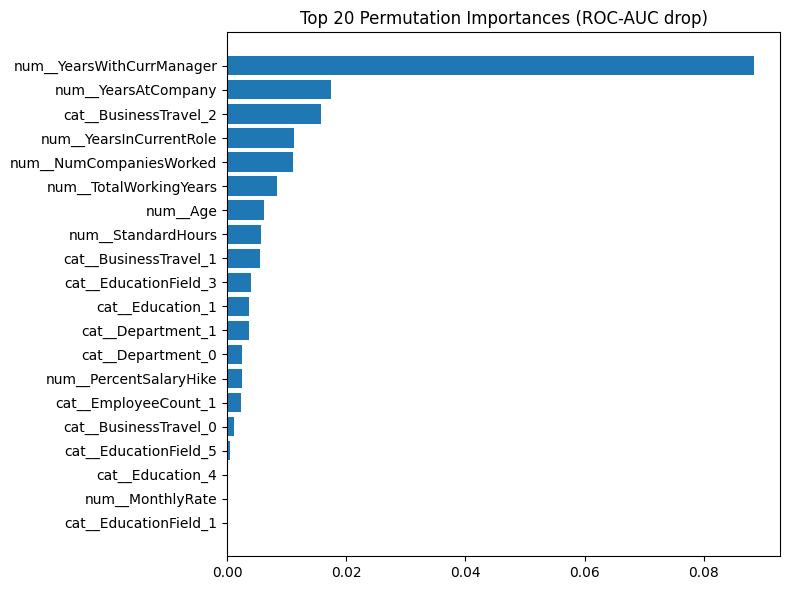

In [ ]:
plt.figure(figsize=(8, 6))
topk = importances.head(20).sort_values("importance_mean")
plt.barh(topk["feature"], topk["importance_mean"])
plt.title("Top 20 Permutation Importances (ROC-AUC drop)")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import (
    classification_report, roc_auc_score, confusion_matrix,
    precision_recall_curve, average_precision_score
)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = df1.copy()
t = df["Attrition"].astype(str).str.strip().str.lower()
y = t.replace({"yes":1,"y":1,"true":1,"1":1,"no":0,"n":0,"false":0,"0":0})
mask_ok = ~y.isna()
df = df.loc[mask_ok].copy()
y = y.loc[mask_ok].astype(int)

cat_cols = [c for c in categorical_features if c != "Attrition"]
num_cols = numerical_features
X = df[cat_cols + num_cols]


C:\Users\Admin\AppData\Local\Temp\ipykernel_83972\819864419.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = t.replace({"yes":1,"y":1,"true":1,"1":1,"no":0,"n":0,"false":0,"0":0})


In [ ]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, stratify=y_train_full, random_state=42
)

In [ ]:
num_pipe2 = SimpleImputer(strategy="median")
cat_pipe2 = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])
preprocess2 = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("imp", num_pipe2), ("sc", StandardScaler(with_mean=True, with_std=True))]), num_cols),
        ("cat", cat_pipe2, cat_cols),
    ],
    remainder="drop"
)


In [ ]:
pipe_smote = ImbPipeline(steps=[
    ("prep", preprocess2),
    ("smote", SMOTE(random_state=42, sampling_strategy="auto", k_neighbors=5)),
    ("model", RandomForestClassifier(
        n_estimators=600,
        max_features="sqrt",
        class_weight=None,   # SMOTE 사용 시 보통 None
        n_jobs=-1,
        random_state=42
    ))
])

In [ ]:
pipe_smote = ImbPipeline(steps=[
    ("prep", preprocess2),
    ("smote", SMOTE(random_state=42, sampling_strategy="auto", k_neighbors=5)),
    ("model", RandomForestClassifier(
        n_estimators=600,
        max_features="sqrt",
        class_weight=None,   # SMOTE 사용 시 보통 None
        n_jobs=-1,
        random_state=42
    ))
])


In [ ]:
pipe_smote.fit(X_tr, y_tr)
val_proba = pipe_smote.predict_proba(X_val)[:, 1]
prec, rec, thr = precision_recall_curve(y_val, val_proba)
f1 = np.where((prec + rec) > 0, 2 * prec * rec / (prec + rec), 0)
best_idx = f1.argmax()
best_thr = thr[best_idx] if best_idx < len(thr) else 0.5

print(f"✅ Val ROC-AUC: {roc_auc_score(y_val, val_proba):.4f} | AP: {average_precision_score(y_val, val_proba):.4f}")
print(f"✅ Best F1 (Val): {f1[best_idx]:.4f} at threshold={best_thr:.3f} "
      f"(P={prec[best_idx]:.4f}, R={rec[best_idx]:.4f})")

✅ Val ROC-AUC: 0.8401 | AP: 0.6210
✅ Best F1 (Val): 0.5794 at threshold=0.283 (P=0.5167, R=0.6596)


In [ ]:
pipe_smote.fit(X_train_full, y_train_full)
test_proba = pipe_smote.predict_proba(X_test)[:, 1]
test_pred = (test_proba >= best_thr).astype(int)

print("\n📊 Test Evaluation (SMOTE + tuned threshold)")
print(classification_report(y_test, test_pred, digits=4))
print(f"ROC-AUC: {roc_auc_score(y_test, test_proba):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred))



📊 Test Evaluation (SMOTE + tuned threshold)
              precision    recall  f1-score   support

           0     0.9324    0.8381    0.8827       247
           1     0.4444    0.6809    0.5378        47

    accuracy                         0.8129       294
   macro avg     0.6884    0.7595    0.7103       294
weighted avg     0.8544    0.8129    0.8276       294

ROC-AUC: 0.8314
Confusion Matrix:
 [[207  40]
 [ 15  32]]


In [ ]:
from sklearn.inspection import permutation_importance


In [ ]:
r_imp = permutation_importance(
    pipe_smote, X_test, y_test,
    n_repeats=15,
    scoring="recall",   
    random_state=42,
    n_jobs=-1
)

In [ ]:
ct2 = pipe_smote.named_steps["prep"]
try:
    feature_names2 = ct2.get_feature_names_out()
except Exception:
    def get_feature_names_from_ct(ct_):
        names = list(ct_.transformers_[0][2])
        cat_pipe_ = ct_.transformers_[1][1]
        cat_features = ct_.transformers_[1][2]
        ohe = cat_pipe_.named_steps["ohe"]
        names += list(ohe.get_feature_names_out(cat_features))
        return names
    feature_names2 = get_feature_names_from_ct(ct2)

In [ ]:
n_imp = r_imp.importances_mean.shape[0]
n_feat = len(feature_names2)
if n_imp != n_feat:
    m = min(n_imp, n_feat)
    feature_names2 = feature_names2[:m]
    imp_mean = r_imp.importances_mean[:m]
    imp_std  = r_imp.importances_std[:m]
else:
    imp_mean = r_imp.importances_mean
    imp_std  = r_imp.importances_std

In [ ]:
importances_recall = (
    pd.DataFrame({
        "feature": feature_names2,
        "importance_mean": imp_mean,
        "importance_std": imp_std
    })
    .sort_values("importance_mean", ascending=False)
    .reset_index(drop=True)
)

In [ ]:
display(importances_recall.head(20))


,feature,importance_mean,importance_std
0,num__TotalWorkingYears,2.127660e-02,0.015538
1,num__YearsAtCompany,1.418440e-02,0.010030
2,num__YearsWithCurrManager,8.510638e-03,0.026688
3,cat__BusinessTravel_2,5.673759e-03,0.018165
4,cat__Education_3,5.673759e-03,0.009409
5,num__Age,2.775558e-18,0.017372
6,cat__EducationField_2,1.850372e-18,0.010987
7,cat__Education_2,0.000000e+00,0.000000
8,num__YearsSinceLastPromotion,0.000000e+00,0.000000
9,num__MonthlyRate,0.000000e+00,0.000000


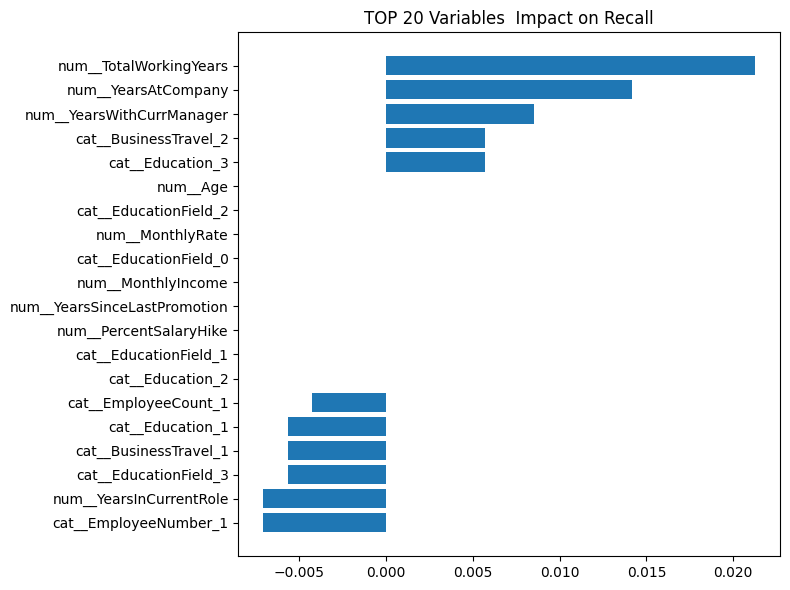

In [ ]:
plt.figure(figsize=(8, 6))
top20 = importances_recall.head(20).sort_values("importance_mean")
plt.barh(top20["feature"], top20["importance_mean"])
plt.title("TOP 20 Variables  Impact on Recall")
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px


In [ ]:
rate_total = data.groupby(['TotalWorkingYears','Attrition']) \
    .apply(lambda x: x['TotalWorkingYears'].count()) \
    .reset_index(name='Counts')

C:\Users\Admin\AppData\Local\Temp\ipykernel_83972\3811340062.py:2: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
rate_total['TotalWorkingYears'] = round(rate_total['TotalWorkingYears'], -1)


In [ ]:
rate_total = rate_total.groupby(['TotalWorkingYears','Attrition']) \
    .apply(lambda x: x['TotalWorkingYears'].count()) \
    .reset_index(name='Counts')

C:\Users\Admin\AppData\Local\Temp\ipykernel_83972\3075240597.py:2: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
tw = data.copy()
tw['TotalWorkingYears'] = round(tw['TotalWorkingYears'], -1)
tw_rate = tw.groupby(['TotalWorkingYears','Attrition']).size().reset_index(name='Counts')
fig1 = px.line(tw_rate, x='TotalWorkingYears', y='Counts', color='Attrition',
               title='Total Working Years vs Attrition Counts')
fig1.show()

In [110]:
df_total = data.copy()
df_total['TotalWorkingYears'] = round(df_total['TotalWorkingYears'], -1)  # 0, 5, 10, ...


total_counts = df_total.groupby('TotalWorkingYears').size().reset_index(name='Total')
yes_counts = df_total[df_total['Attrition'] == 'Yes'].groupby('TotalWorkingYears').size().reset_index(name='Yes')


merge_total = pd.merge(total_counts, yes_counts, on='TotalWorkingYears', how='left').fillna(0)
merge_total['Attrition_Rate'] = (merge_total['Yes'] / merge_total['Total']) * 100

fig = px.line(
    merge_total,
    x='TotalWorkingYears',
    y='Attrition_Rate',
    markers=True,
    title='Total Working Years별 이직률 (%)',
    labels={'Attrition_Rate': 'Attrition Rate (%)'}
)
fig.update_traces(text=merge_total['Attrition_Rate'].round(1), textposition="top center")
fig.update_layout(
    yaxis_ticksuffix="%",
    xaxis_title="Total Working Years (rounded)",
    yaxis_title="Attrition Rate (%)"
)
fig.show()

In [ ]:
yc = data.copy()
yc['YearsAtCompany'] = round(yc['YearsAtCompany'], -1)
yc_rate = yc.groupby(['YearsAtCompany','Attrition']).size().reset_index(name='Counts')
fig2 = px.line(yc_rate, x='YearsAtCompany', y='Counts', color='Attrition',
               title='Years At Company vs Attrition Counts')
fig2.show()

In [87]:
import pandas as pd
import plotly.express as px

df_years = data.copy()
df_years['YearsAtCompany'] = round(df_years['YearsAtCompany'], -1)  # 0, 5, 10, ...


total_counts = df_years.groupby('YearsAtCompany').size().reset_index(name='Total')
yes_counts = df_years[df_years['Attrition'] == 'Yes'].groupby('YearsAtCompany').size().reset_index(name='Yes')


merge = pd.merge(total_counts, yes_counts, on='YearsAtCompany', how='left').fillna(0)
merge['Attrition_Rate'] = (merge['Yes'] / merge['Total']) * 100

fig = px.line(
    merge,
    x='YearsAtCompany',
    y='Attrition_Rate',
    markers=True,
    title='YearsAtCompany별 이직률 (%)',
    labels={'Attrition_Rate': 'Attrition Rate (%)'}
)
fig.update_traces(text=merge['Attrition_Rate'].round(1), textposition="top center")
fig.update_layout(yaxis_ticksuffix="%", xaxis_title="Years at Company (rounded)", yaxis_title="Attrition Rate (%)")
fig.show()

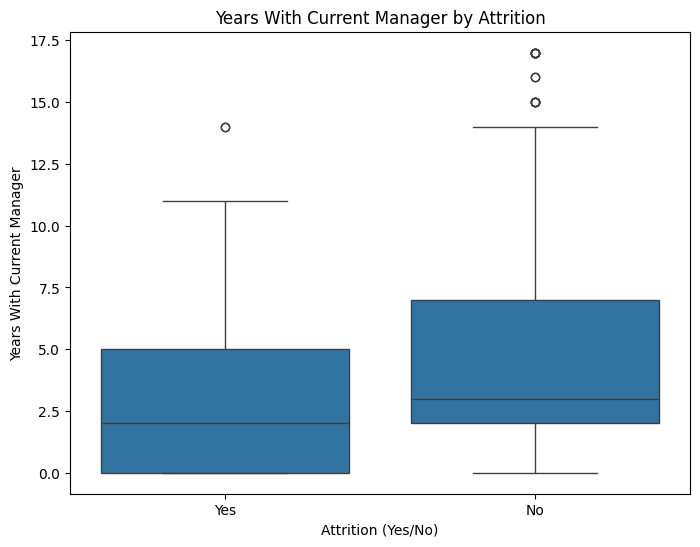

In [82]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='Attrition', y='YearsWithCurrManager')
plt.title("Years With Current Manager by Attrition")
plt.ylabel("Years With Current Manager")
plt.xlabel("Attrition (Yes/No)")
plt.show()

In [83]:
bt_rate = data.groupby(['BusinessTravel','Attrition']).size().reset_index(name='Counts')
fig4 = px.bar(bt_rate, x='BusinessTravel', y='Counts', color='Attrition', barmode='group',
              title='Business Travel vs Attrition Counts')
fig4.show()

In [86]:
bt_counts = data.groupby("BusinessTravel").size().reset_index(name="Total")
bt_yes = data[data["Attrition"] == "Yes"].groupby("BusinessTravel").size().reset_index(name="Yes")

# 2️⃣ 병합 및 이직률 계산
bt_merge = pd.merge(bt_counts, bt_yes, on="BusinessTravel", how="left").fillna(0)
bt_merge["Attrition_Rate"] = (bt_merge["Yes"] / bt_merge["Total"]) * 100

# 3️⃣ 시각화 – 이직률 (%) 막대그래프
fig = px.bar(
    bt_merge,
    x="BusinessTravel",
    y="Attrition_Rate",
    text="Attrition_Rate",
    title="Business Travel별 이직률 (%)",
    labels={"Attrition_Rate": "Attrition Rate (%)"}
)
fig.update_traces(texttemplate="%{text:.1f}%", textposition="outside")
fig.update_layout(
    yaxis_ticksuffix="%",
    xaxis_title="Business Travel Category",
    yaxis_title="Attrition Rate (%)"
)
fig.show()

In [84]:
edu_rate = data.groupby(['Education','Attrition']).size().reset_index(name='Counts')
fig5 = px.bar(edu_rate, x='Education', y='Counts', color='Attrition', barmode='group',
              title='Education vs Attrition Counts')
fig5.show()

In [85]:
edu_counts = data.groupby("Education").size().reset_index(name="Total")
edu_yes = data[data["Attrition"] == "Yes"].groupby("Education").size().reset_index(name="Yes")

# 병합 후 비율 계산
edu_merge = pd.merge(edu_counts, edu_yes, on="Education", how="left").fillna(0)
edu_merge["Attrition_Rate"] = (edu_merge["Yes"] / edu_merge["Total"]) * 100

# 📊 이직률 시각화
fig = px.bar(
    edu_merge,
    x="Education",
    y="Attrition_Rate",
    text="Attrition_Rate",
    title="Education별 이직률 (%)",
    labels={"Attrition_Rate": "Attrition Rate (%)"}
)
fig.update_traces(texttemplate="%{text:.1f}%", textposition="outside")
fig.update_layout(yaxis_ticksuffix="%", xaxis_title="Education Level", yaxis_title="Attrition Rate (%)")
fig.show()